**Problem Statement:** Perform a complete data cleaning and EDA on the Titanic dataset. Summarize your findings in a report.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Step 1: Load the Dataset
data=sns.load_dataset('titanic')
df=pd.DataFrame(data)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [52]:
#Step 2: Basic Information
# Get dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [53]:
# Summary statistics
print(df.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [ ]:
#Clean the dataset (handle missing values, remove duplicates, correct inconsistencies).
#Step 1: Handle Missing Values
# print(df.isnull().sum())
# df.dropna(inplace=True)
df['age'].fillna(df['age'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df.drop('deck', axis=1, inplace=True)
print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


C:\Users\MBS\AppData\Local\Temp\ipykernel_8968\3477006638.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
C:\Users\MBS\AppData\Local\Temp\ipykernel_8968\3477006638.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [55]:
#Step 2: Remove Duplicates
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("After Removing Duplicates:",df.duplicated().sum())

111
After Removing Duplicates: 0


In [57]:
#Step 3: Correct Inconsistencies
# Convert 'Sex' to categorical values
df['sex']=df['sex'].astype('category')
# Convert 'Pclass' to categorical values
df['pclass']=df['pclass'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 780 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     780 non-null    int64   
 1   pclass       780 non-null    category
 2   sex          780 non-null    category
 3   age          780 non-null    float64 
 4   sibsp        780 non-null    int64   
 5   parch        780 non-null    int64   
 6   fare         780 non-null    float64 
 7   embarked     780 non-null    object  
 8   class        780 non-null    category
 9   who          780 non-null    object  
 10  adult_male   780 non-null    bool    
 11  embark_town  780 non-null    object  
 12  alive        780 non-null    object  
 13  alone        780 non-null    bool    
dtypes: bool(2), category(3), float64(2), int64(3), object(4)
memory usage: 65.1+ KB


**Exploratory Data Analysis (EDA)** involves analyzing the dataset to uncover patterns, trends, and relationships

In [78]:
#Perform EDA to analyze survival rates by gender, class, age, and family size.
survival_rate=df['survived'].mean()
print(f"Survival Rate: {survival_rate:.2%}")
#Survival Ratio by Class
print(df.groupby('pclass')['survived'].mean())
#Survival_rate by gender
print(df.groupby('sex')['survived'].mean())
#Survival by age
print(df.groupby('age')['survived'].mean())

Survival Rate: 41.28%
pclass
1    0.636792
2    0.506098
3    0.257426
Name: survived, dtype: float64
sex
female    0.739726
male      0.217213
Name: survived, dtype: float64
age
0.42     1.0
0.67     1.0
0.75     1.0
0.83     1.0
0.92     1.0
        ... 
70.00    0.0
70.50    0.0
71.00    0.0
74.00    0.0
80.00    1.0
Name: survived, Length: 89, dtype: float64


C:\Users\MBS\AppData\Local\Temp\ipykernel_8968\1426581367.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('pclass')['survived'].mean())
C:\Users\MBS\AppData\Local\Temp\ipykernel_8968\1426581367.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('sex')['survived'].mean())


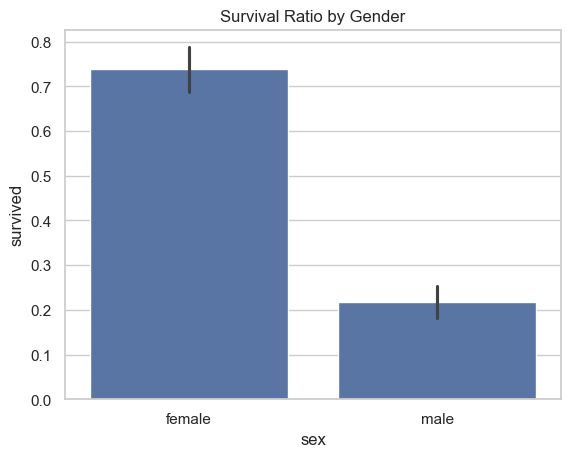

In [74]:
#Step 2: Visualize Data
sns.set_theme(style='whitegrid')
#Survival Ratio by gender
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Ratio by Gender")
plt.show()

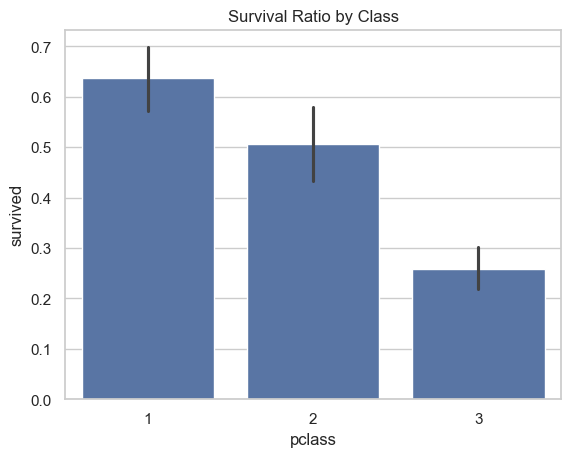

In [79]:
##Survival Ratio by Class
sns.barplot(x='pclass', y='survived', data=df)
plt.title("Survival Ratio by Class")
plt.show()

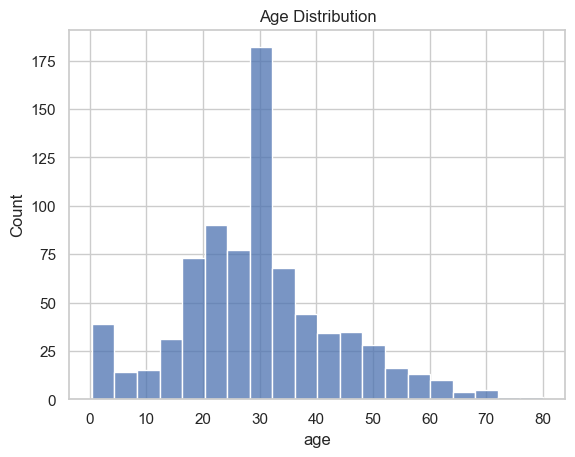

In [76]:
sns.histplot(df['age'], bins=20)
plt.title("Age Distribution")
plt.show()

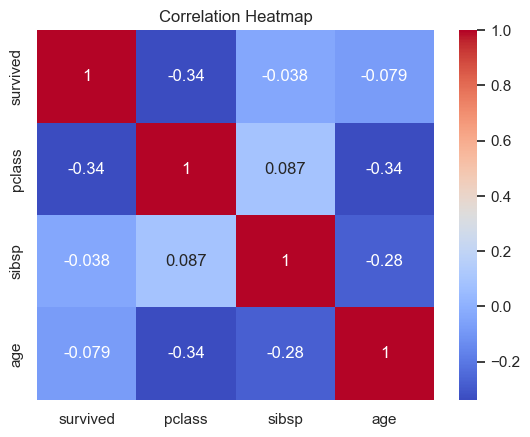

In [87]:
# Correlation heatmap
corr = df[['survived', 'pclass', 'sibsp', 'age']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [90]:
#Step 3: Advanced Analysis
# Survival rate by age group
df['Age_Group']=pd.cut(df['age'], bins=[0,18,30,50,100], labels=['0-18', '19-30','31-50','51+'])
print(df.groupby('Age_Group')['survived'].mean())

# Survival rate by family size
df['Family_Size']=df['sibsp']+df['parch']
print(df.groupby('Family_Size')['survived'].mean())

Age_Group
0-18     0.511111
19-30    0.376068
31-50    0.428571
51+      0.349206
Name: survived, dtype: float64
Family_Size
0     0.337104
1     0.551948
2     0.574257
3     0.714286
4     0.230769
5     0.136364
6     0.333333
7     0.000000
10    0.000000
Name: survived, dtype: float64


C:\Users\MBS\AppData\Local\Temp\ipykernel_8968\3196278027.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Age_Group')['survived'].mean())
